# Fall Problem Session 2
## Intro to Supervised Learning & Simple Linear Regression

The problems in this notebook will cover the content covered in our introductory `Supervised Learning` and `Regression` lectures including:
- `A Supervised Learning Framework`,
- `Data Splits for Predictive Modeling` and
- `Simple Linear Regression`.

They also serve as a good lead-in to `A First Predictive Modeling Project`.

In [1]:
## We first load in packages we will need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

Matplotlib is building the font cache; this may take a moment.


#### 1. Introducing the data

In this notebook you will work with a data set on vehicle prices found on Kaggle.com, <a href="https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho">https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho</a>.

These data provide the selling price of various vehicles as well as various features that may or may not be related to those selling prices.

##### a. 

First load the data for this problem. It is stored in the file `car_sales.csv` in the `Data` folder of the repository. After loading the data look at the first five rows of the dataset. Then run `cars.info()`, are there any missing values?

In [2]:
import os

In [3]:
cars = pd.read_csv('/Users/danieltuthill/Documents/code-2022/Data/car_sales.csv')

In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8127 non-null   float64
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 825.6+ KB


In [5]:
cars.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500.0,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000.0,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000.0,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000.0,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000.0,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


##### b.

Take a second to read through the descriptions for each of the columns of the data set.

- `name`: the name of the vehicle that was sold
- `year`: the year that the vehicle was made
- `selling_price`: the price of the vehicle when it was sold, what we want to predict
- `km_driven`: the number of kilometers the vehicle had driven by the time it was sold
- `fuel`: what kind of fuel the vehicle takes
- `seller_type`: the kind of entity selling the vehicle
- `transmission`: the kind of transmission in the vehicle
- `owner`: how many owners has this vehicle had
- `mileage`: how many kilometers per hour the vehicle is expected to get
- `engine`: size of the engine in cubic centimeters
- `max_power`: the maximum horsepower of the vehicle
- `torque`: the torque of the vehicle
- `seats`: the number of seats in the vehicle

##### c.

Come up with two use cases for this data set. Try to make one fit more with an explanatory modeling perspective and the other with a predictive modeling perspective.

##### Write your response down here

##### d. 

There are future lecture notebooks that cover ways to <i>impute</i> missing values, but for this notebook you will simply remove the missing values. 

Use `dropna`, <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html">https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html</a> to get a version of the data set that has had the missing values removed.

In [6]:
cars.dropna(inplace=True)

In [7]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7905 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7905 non-null   object 
 1   year           7905 non-null   int64  
 2   selling_price  7905 non-null   int64  
 3   km_driven      7905 non-null   float64
 4   fuel           7905 non-null   object 
 5   seller_type    7905 non-null   object 
 6   transmission   7905 non-null   object 
 7   owner          7905 non-null   object 
 8   mileage        7905 non-null   object 
 9   engine         7905 non-null   object 
 10  max_power      7905 non-null   object 
 11  torque         7905 non-null   object 
 12  seats          7905 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 864.6+ KB


##### e.

Looking at the first five rows you can notice that the columns `mileage`, `engine` and `max_power` represent numeric variables, but currently contain text. Before doing any modeling you will have to clean the data a little bit.

Using `.apply`, <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html">https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html</a>, and the function `clean_column` below clean up the `mileage`, `engine` and `max_power` columns. The end results should be purely numeric versions of those columns.

We should also transform `year` slightly. These data were uploaded in 2020, meaning we can use 2020 as a reference year to calculate the age of the car at the moment it was sold. Create a new column called `age` that calculates the age of the car using 2020 as the reference year.

In [8]:
def clean_column(text):
    return float(text.split()[0])

In [9]:
cars['mileage']=cars['mileage'].apply(clean_column)

In [10]:
cars['engine']=cars['engine'].apply(clean_column)

In [11]:
cars['max_power']=cars['max_power'].apply(clean_column)

In [12]:
cars['age']=2020-cars['year']

In [13]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7905 entries, 0 to 8127
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7905 non-null   object 
 1   year           7905 non-null   int64  
 2   selling_price  7905 non-null   int64  
 3   km_driven      7905 non-null   float64
 4   fuel           7905 non-null   object 
 5   seller_type    7905 non-null   object 
 6   transmission   7905 non-null   object 
 7   owner          7905 non-null   object 
 8   mileage        7905 non-null   float64
 9   engine         7905 non-null   float64
 10  max_power      7905 non-null   float64
 11  torque         7905 non-null   object 
 12  seats          7905 non-null   float64
 13  age            7905 non-null   int64  
dtypes: float64(5), int64(3), object(6)
memory usage: 926.4+ KB


### Predictive Model

In the next couple of problem session notebooks you will build a series of models to predict the sale price of a given vehicle. In this notebook we will work on models that take in a single feature and use multiple features in a later notebook.

#### 2. Train test split

The first step in predictive modeling is performing a train test split. Perform a train test split on these data, setting aside $20\%$ of the data as a test set. Choose a `random_state` so your results are reproducible.

As a refresher you can use `sklearn`'s `train_test_split` function, <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html">https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html</a>.

In [14]:
## import train_test_split here

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [15]:
## Make the train test split here

train,test = train_test_split(cars,test_size=0.2,random_state=333,shuffle=True)


#### 3. Exploratory data analysis (EDA)

After the train test split we can work on some exploratory data analysis. Here is where we start to look at the data and see if we can generate any modeling ideas or hypotheses. You will make a series of plots and learn a modeling trick that should improve any models we make.

##### a.

Make a histogram of `selling_price` and `km_driven` using the data below.

<i>Note: be sure to only use the training data.</i>

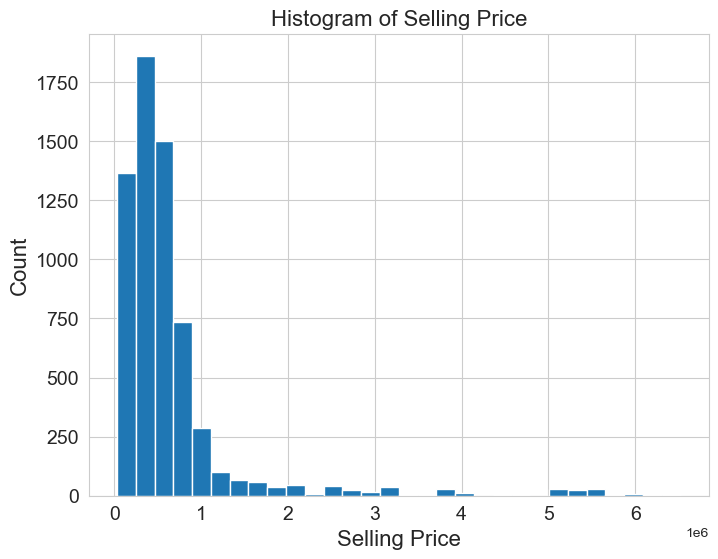

In [16]:
## Fill in the missing code
plt.figure(figsize=(8,6))

plt.hist(train['selling_price'], bins=30)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.ylabel("Count", fontsize=16)
plt.xlabel("Selling Price", fontsize=16)

plt.title("Histogram of Selling Price", fontsize=16)

plt.show()

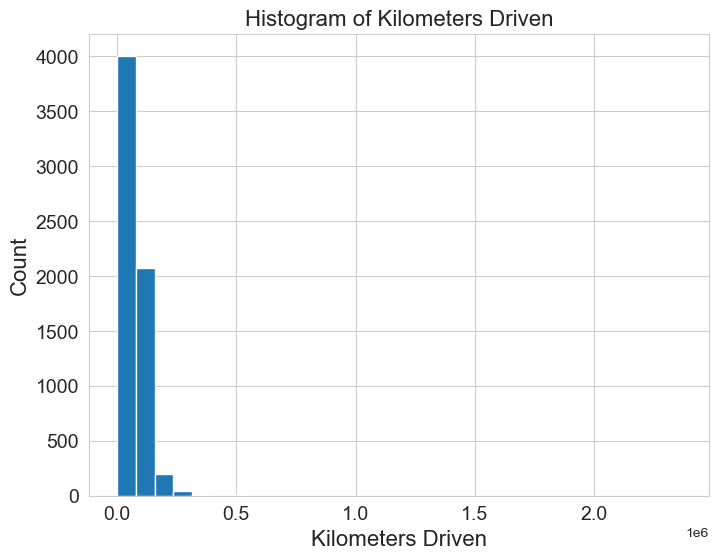

In [17]:
## Fill in the missing code
plt.figure(figsize=(8,6))

plt.hist(train['km_driven'], bins=30)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.ylabel("Count", fontsize=16)
plt.xlabel("Kilometers Driven", fontsize=16)

plt.title("Histogram of Kilometers Driven", fontsize=16)

plt.show()

##### b. 

Now use `seaborn`'s `pairplot`, <a href="https://seaborn.pydata.org/generated/seaborn.pairplot.html">https://seaborn.pydata.org/generated/seaborn.pairplot.html</a> to plot `selling_price` against `km_driven`, `mileage` and `age`.

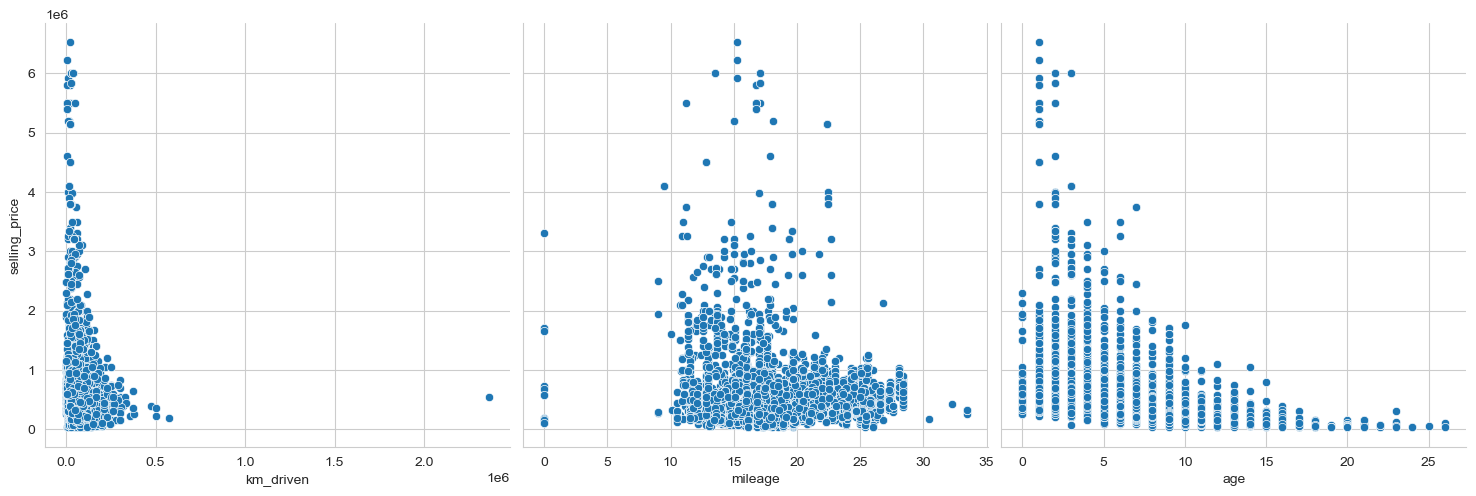

In [25]:
## Fill in the missing code
sns.pairplot(data = train,
                y_vars = ['selling_price'],
                x_vars = ['km_driven','mileage','age'],
                height = 5)

plt.show()

##### c.

Do any of the previous relationships look linear? 

##### Write your answer here

##### d.

Now you will learn a common trick in regression. When your distribution is highly skewed it can be useful to perform a $\log$ transformation on the data. This is done to hopefully improve the assumption in linear regression of a linear relationship.

Make new columns in your training set that take the base 10 $\log$ of `selling_price` and `km_driven`, then remake the `pairplot` replacing `selling_price` and `km_driven` with these newly transformed columns.

<i>Hint: <a href="https://numpy.org/doc/stable/reference/generated/numpy.log10.html">https://numpy.org/doc/stable/reference/generated/numpy.log10.html</a></i>

In [28]:
## get the log of selling_price here
train['log_sell'] = np.log10(cars['selling_price'])

In [29]:
## get the log of km_driven here
train['log_km'] = np.log10(cars['km_driven'])

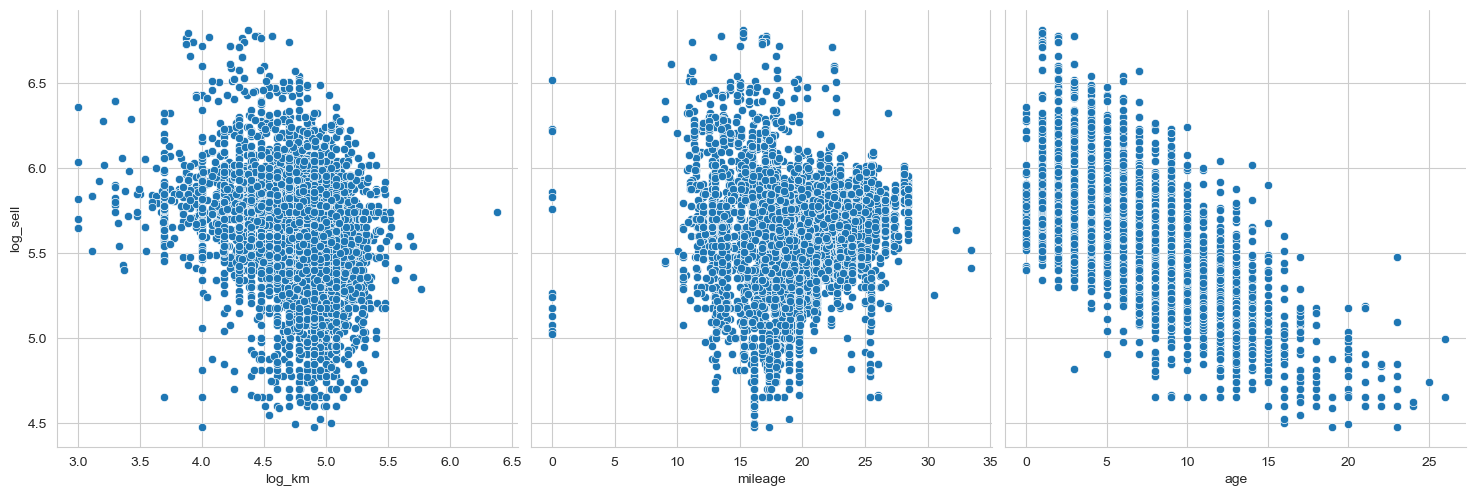

In [30]:
## make the new pairplot here
## Fill in the missing code
sns.pairplot(data = train,
                y_vars = ['log_sell'],
                x_vars = ['log_km','mileage','age'],
                height = 5)

plt.show()

##### e.

Another part of EDA is calculating descriptive statistics.

One statistic of interest to us in this situation is the <i>Pearson correlation coefficient</i>. For two variables $x$ and $y$ with $n$ observations each the Pearson correlation is given by:

$$
r = \frac{\sum_{i=1}^n \left( x_i - \overline{x} \right) \left( y_i - \overline{y}  \right)}{\sqrt{\sum_{i=1}^n \left(x_i - \overline{x}\right)^2 \sum_{i=1}^n \left(y_i - \overline{y} \right)^2}} = \frac{\text{cov}\left(x, y\right)}{\sigma_x \sigma_y},
$$

where $x_i$ is the $i^\text{th}$ observation, $\overline{x} = \sum_{i=1}^n x_i/n$, $\text{cov}\left( x, y \right)$ is the covariance between $x$ and $y$, and $\sigma_x$ denotes the standard deviation of $x$.

$r \in [-1,1]$ gives a sense of the strength of the linear relationship between $x$ and $y$. The closer to $1$ $|r|$ is, the stronger the linear relationship between $x$ and $y$, the sign of $r$ determines the direction of the relationship, with $r < 0$ meaning a line with a negative slope and $r > 0$ a line with a positive slope.

Calculate the correlation between `log_sell` and the columns you have previously plotted.

<i>Hint: Either <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html">https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html</a> or <a href="https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html">https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html</a> should work.</i>.

In [39]:
train[['log_sell','log_km','mileage','age']].corr()['log_sell']

log_sell    1.000000
log_km     -0.360641
mileage    -0.041016
age        -0.701537
Name: log_sell, dtype: float64

#### 4. Modeling

Now you will build some preliminary models for this data set.

##### a.

When doing predictive modeling it is good practice to have a <i>baseline model</i> which is a simple "model" solely for comparison purposes. These are not, typically, complex or good models, but they are important reference points to give us a sense of how well our models are actually performing.

A standard regression model baseline is to just predict the average value of $y$ for any value of $X$. In this setting that model looks like this:

$$
\text{Baseline Model: } \ \ \ \ \log\left(\text{Selling Price}\right) = E(\log\left(\text{Selling Price}\right)) + \epsilon,
$$

where $\epsilon$ is some random noise.

Write some code to estimate $E(\log\left(\text{Selling Price}\right))$ using the training set.

In [40]:
model0= np.mean(train['log_sell'])

##### b.

Below you will use cross-validation to compare these three models and the baseline model from above:

$$
\text{Model 1}: \ \log\left(\text{Selling Price}\right) = \beta_0 + \beta_1 \log\left( \text{Kilometers Driven} \right) + \epsilon
$$

$$
\text{Model 2}: \ \log\left(\text{Selling Price}\right) = \beta_0 + \beta_1 \text{Mileage} + \epsilon
$$

$$
\text{Model 3}: \ \log\left(\text{Selling Price}\right) = \beta_0 + \beta_1 \text{Age} + \epsilon
$$

In this problem practice fitting one of these three models using the training set and `sklearn`'s `LinearRegression` model, <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html">https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html</a>.

In [21]:
## import LinearRegression here
from sklearn.linear_model import LinearRegression

In [48]:
## Make and fit the model here using the training data

slr = LinearRegression()

slr.fit(train[['log_sell']],train['log_km'])

LinearRegression()

In [49]:
## look at the intercept

slr.intercept_

6.848773266812737

In [52]:
## look at the slope

slr.coef_[0]

-0.37863268936898

##### c.

In this problem you will try to implement $5$-fold cross-validation (CV) to compare these three models and the baseline model to see which one has the lowest average cross-validation mean squared error (MSE).

Because this may be your first time implementing CV, some of the code will be filled in for you.

In [54]:
## import KFold here
from sklearn.model_selection import KFold

## import mean_squared_error
from sklearn.metrics import mean_squared_error

In [56]:
## Make a KFold object
## remember to set a random_state and set shuffle = True
kfold = KFold(random_state = 1, shuffle=True)




## This array will hold the mse for each model and split
## Each row is a different model, each column a different split
mses = np.zeros((4, 5))

## sets a split counter
i = 0

## loop through the kfold here
for train_index, validation_index in kfold.split(train):
    ## cv training set
    cars_tt = train.iloc[train_index]
    
    ## cv holdout set
    cars_ho = train.iloc[validation_index]
    
    ## "Fit" and get ho mse for the baseline model
    baseline_pred = cars_tt['log_sell'].mean()*np.ones(len(cars_ho),)
    
    mses[0, i] = mean_squared_error(cars_ho['log_sell'],baseline_pred)
    
    ## Fit and get ho mse for model 1
    model1 = LinearRegression()
    
    model1.fit(cars_tt[['log_km']],cars_tt['log_sell'])
    
    mses[1, i] = mean_squared_error(cars_ho['log_sell'],model1.predict(cars_ho[['log_km']]))
    
    
    ## Fit and get ho mse for model 2
    model2 = LinearRegression()
    
    model2.fit(cars_tt[['mileage']],cars_tt['log_sell'])
    
    mses[2, i] = mean_squared_error(cars_ho['log_sell'],model2.predict(cars_ho[['mileage']]))
    
    
    ## Fit and get ho mse for model 3
    model3 = LinearRegression()
    
    model3.fit(cars_tt[['age']],cars_tt['log_sell'])
    
    mses[3, i] = mean_squared_error(cars_ho['log_sell'],model3.predict(cars_ho[['age']]))
    
    
    
    i = i + 1

In [59]:
## Find the avg cv mse for each model here
mses.mean(1)

array([0.12850048, 0.11180226, 0.1283246 , 0.06523144])

##### d.

Which model had the lowest average cross validation mean squared error?

That's it for this notebook. In the next couple of regression based notebooks we will build additional models for this data set.

--------------------------

This notebook was written for the Erd&#337;s Institute C&#337;de Data Science Boot Camp by Matthew Osborne, Ph. D., 2022.

Any potential redistributors must seek and receive permission from Matthew Tyler Osborne, Ph.D. prior to redistribution. Redistribution of the material contained in this repository is conditional on acknowledgement of Matthew Tyler Osborne, Ph.D.'s original authorship and sponsorship of the Erdős Institute as subject to the license (see License.md)